In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
from natsort import natsorted
import matplotlib.pyplot as plt
import decoupler as dc

sns.set_context("paper", font_scale=2) # set some nice global plotting settings.

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
tissue = 'CortexHippocampus'

In [3]:
plate_palette = sns.color_palette("husl", n_colors=3)
sex_palette = ['hotpink','dodgerblue']
geno_palette = ['#DA9CC1', '#F4C245', '#C0BFBF', '#55AF5B', '#4F6EAF', '#52A5DB', '#D83026', '#683C91']


In [4]:
adata = sc.read_h5ad(f'../IGVF_analysis/cellbender_tissues/{tissue}_processed.h5ad')



In [5]:
adata

AnnData object with n_obs × n_vars = 731687 × 56953
    obs: 'lab_sample_id', 'sample', 'plate', 'subpool', 'SampleType', 'Tissue', 'Sex', 'Age', 'Genotype', 'subpool_type', 'Protocol', 'Chemistry', 'bc', 'bc1_sequence', 'bc2_sequence', 'bc3_sequence', 'bc1_well', 'bc2_well', 'bc3_well', 'Row', 'Column', 'well_type', 'Mouse_Tissue_ID', 'DOB', 'Age_days', 'Body_weight_g', 'Estrus_cycle', 'Dissection_date', 'Dissection_time', 'ZT', 'Dissector', 'Tissue_weight_mg', 'Notes', 'n_genes_by_counts_raw', 'total_counts_raw', 'total_counts_mt_raw', 'pct_counts_mt_raw', 'n_genes_by_counts_cb', 'total_counts_cb', 'total_counts_mt_cb', 'pct_counts_mt_cb', 'doublet_score', 'predicted_doublet', 'background_fraction', 'cell_probability', 'cell_size', 'droplet_efficiency', 'leiden'
    var: 'gene_id', 'gene_name', 'mt', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden', 'log1p', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap', 'gene_expression_encoding'
    layers: '

In [6]:
adata.obs.head()

lab_sample_id sample     plate    subpool  \
cellID                                                                      
C4_B1_C3_Subpool_1_igvf_012   046_NZOJ_10F_03     NA  igvf_012  Subpool_1   
C2_F8_C4_Subpool_1_igvf_012   046_NZOJ_10F_03     NA  igvf_012  Subpool_1   
C2_E7_G9_Subpool_1_igvf_012   046_NZOJ_10F_03     NA  igvf_012  Subpool_1   
C1_E9_G10_Subpool_1_igvf_012  046_NZOJ_10F_03     NA  igvf_012  Subpool_1   
C4_C4_G9_Subpool_1_igvf_012   046_NZOJ_10F_03     NA  igvf_012  Subpool_1   

                             SampleType             Tissue     Sex     Age  \
cellID                                                                       
C4_B1_C3_Subpool_1_igvf_012      Nuclei  CortexHippocampus  Female  PNM_02   
C2_F8_C4_Subpool_1_igvf_012      Nuclei  CortexHippocampus  Female  PNM_02   
C2_E7_G9_Subpool_1_igvf_012      Nuclei  CortexHippocampus  Female  PNM_02   
C1_E9_G10_Subpool_1_igvf_012     Nuclei  CortexHippocampus  Female  PNM_02   
C4_C4_G9_Subpool_1_igvf_012      Nuclei  CortexHippocampus  Female  PNM_02   

                             Genotype subpool_type  ... total_counts_cb  \
cellID                                              ...                   
C4_B1_C3_Subpool_1_igvf_012      NZOJ           NO  ...        146122.0   
C2_F8_C4_Subpool_1_igvf_012      NZOJ           NO  ...        135892.0   
C2_E7_G9_Subpool_1_igvf_012      NZOJ           NO  ...        129891.0   
C1_E9_G10_Subpool_1_igvf_012     NZOJ           NO  ...        109520.0   
C4_C4_G9_Subpool_1_igvf_012      NZOJ           NO  ...         89665.0   

                             total_counts_mt_cb pct_counts_mt_cb  \
cellID                                                             
C4_B1_C3_Subpool_1_igvf_012                28.0         0.019162   
C2_F8_C4_Subpool_1_igvf_012                15.0         0.011038   
C2_E7_G9_Subpool_1_igvf_012                17.0         0.013088   
C1_E9_G10_Subpool_1_igvf_012                6.0         0.005478   
C4_C4_G9_Subpool_1_igvf_012                14.0         0.015614   

                             doublet_score predicted_doublet  \
cellID                                                         
C4_B1_C3_Subpool_1_igvf_012       0.111111             False   
C2_F8_C4_Subpool_1_igvf_012       0.066667             False   
C2_E7_G9_Subpool_1_igvf_012       0.080645             False   
C1_E9_G10_Subpool_1_igvf_012      0.080645             False   
C4_C4_G9_Subpool_1_igvf_012       0.069388             False   

                             background_fraction cell_probability  \
cellID                                                              
C4_B1_C3_Subpool_1_igvf_012             0.000109         0.999955   
C2_F8_C4_Subpool_1_igvf_012             0.000132         0.999955   
C2_E7_G9_Subpool_1_igvf_012             0.000123         0.999955   
C1_E9_G10_Subpool_1_igvf_012            0.000128         0.999955   
C4_C4_G9_Subpool_1_igvf_012             0.000245         0.999955   

                                 cell_size droplet_efficiency leiden  
cellID                                                                
C4_B1_C3_Subpool_1_igvf_012   58400.378906           2.499987      4  
C2_F8_C4_Subpool_1_igvf_012   54340.687500           2.499933      4  
C2_E7_G9_Subpool_1_igvf_012   51951.093750           2.499962      4  
C1_E9_G10_Subpool_1_igvf_012  43849.246094           2.498905      4  
C4_C4_G9_Subpool_1_igvf_012   35953.289062           2.498132      4  

[5 rows x 48 columns]

In [7]:
adata.var.head()

gene_id      gene_name     mt  highly_variable  \
gene_name                                                                    
4933401J01Rik  ENSMUSG00000102693.2  4933401J01Rik  False            False   
Gm26206        ENSMUSG00000064842.3        Gm26206  False            False   
Xkr4           ENSMUSG00000051951.6           Xkr4  False            False   
Gm18956        ENSMUSG00000102851.2        Gm18956  False            False   
Gm37180        ENSMUSG00000103377.2        Gm37180  False            False   

                      means  dispersions  dispersions_norm  
gene_name                                                   
4933401J01Rik  1.668823e-05    -0.394898         -1.645538  
Gm26206        1.000000e-12          NaN               NaN  
Xkr4           2.436345e+00     2.329934         -0.847109  
Gm18956        3.845558e-04     0.796141         -0.261666  
Gm37180        1.599163e-01     0.691258         -0.383530

In [8]:
def stacked_barplot_proportions(adata, cluster_key, var_key, fsize=(12, 6), annotations=True, reverse_order=False, custom_order=None, custom_colors=None):
    colors = sns.color_palette("husl", n_colors=len(adata[var_key].unique()))

    # Group the data by 'cluster_key' and 'var_key', count occurrences, and calculate proportions
    grouped_data = adata.groupby([cluster_key, var_key]).size().unstack().fillna(0)
    proportions = grouped_data.div(grouped_data.sum(axis=1), axis=0)

    # Apply custom order if provided
    if custom_order:
        proportions = proportions.loc[custom_order]
    if custom_colors:
        colors = custom_colors

    # Reverse the order of the DataFrame if reverse_order is True
    if reverse_order:
        proportions = proportions.iloc[::-1]
        m = adata.groupby([cluster_key]).size().to_frame().iloc[::-1]
    else:
        m = adata.groupby([cluster_key]).size().to_frame()

    #sns.set_style('white')
    # Create the stacked bar plot
    ax = proportions.plot(kind='barh', color=colors, stacked=True, figsize=fsize, width=0.8, edgecolor=None)

    if annotations:
        for i, txt in enumerate(m[0]):
            ax.text(0.875, i, txt, fontsize=14, va='center', transform=ax.get_yaxis_transform())

    plt.xlim(0, 1.15)
    ax.tick_params(axis="x", labelsize=14)
    ax.tick_params(axis="y", labelsize=14)
    ax.set_xlabel("Proportion")
    ax.set_ylabel(cluster_key)
    ax.set_title(f'{var_key} by {cluster_key}')

    if annotations:
        ax.legend(title=var_key, bbox_to_anchor=(1.05, 1), loc='upper left')
    else:
        ax.get_legend().remove()

    ax.grid(False)
    
    plt.show()

In [9]:
stacked_barplot_proportions(adata.obs, 
                            'leiden', 'Sex',
                            reverse_order = True,
                            fsize = (6.5,15), 
                            custom_colors = sex_palette,
                            annotations = True)


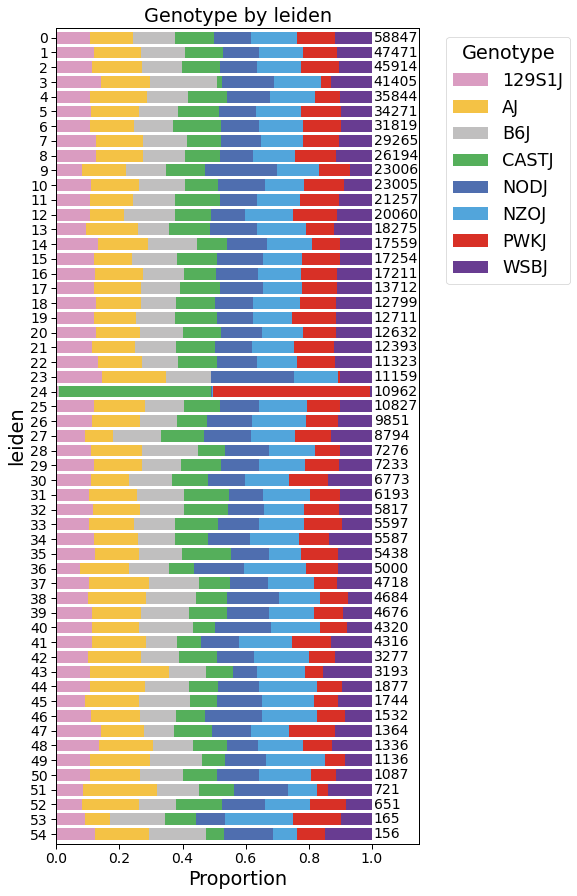

In [10]:
stacked_barplot_proportions(adata.obs, 
                            'leiden', 'Genotype',
                            reverse_order = True,
                            fsize = (6.5,15), 
                            custom_colors = geno_palette,
                            annotations = True)


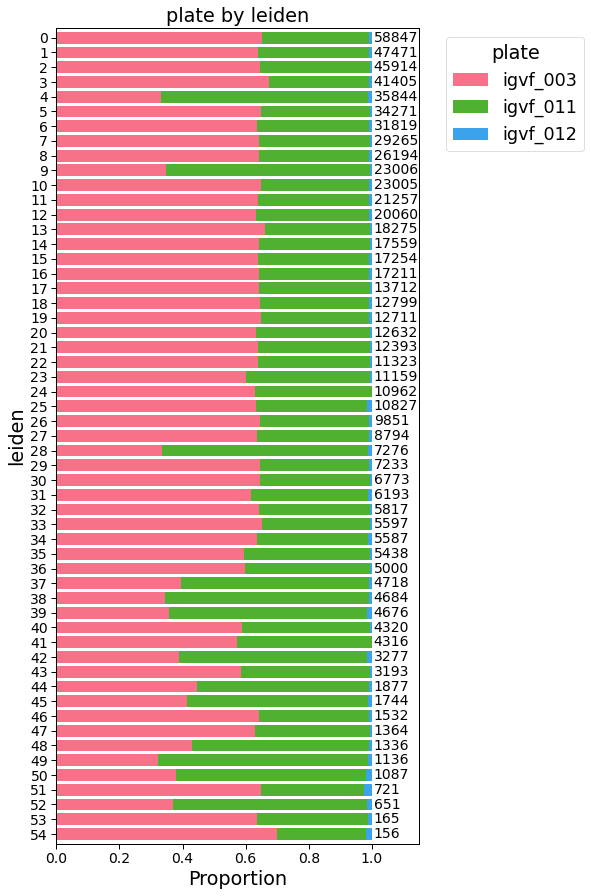

In [11]:
stacked_barplot_proportions(adata.obs, 
                            'leiden', 'plate',
                            reverse_order = True,
                            fsize = (6.5,15), 
                            custom_colors = plate_palette,
                            annotations = True)


In [12]:
smol_marker_genes_dict = {
    "Endothelial": ["Flt1"],
    "Pericyte": ["Vtn"],
    "VLMC": ["Dcn",'Slc6a13','Ptgds'], 
    "ABC (type of VLMC)": ['Mgp','Slc47a1','Dapl1','Bnc2'],
    "OEC": ['Prss56'],
    "Epithelial":["Kl","Ttr","Clic6"],
    "Ependymal":["Tmem212","Dnah6"],
    "Microglia": ["Cx3cr1","Hexb","Inpp5d"],
    "Astrocyte": ["Gfap","Clu","Slc1a3"],
    "Neuron": ["Mir124a-1hg", "Snap25"],
    "Neuroblast":["Igfbpl1","Dlx2",'Cdca7','Top2a'],
    "Glutamatergic neuron": ["Slc17a7"],
    "Cajal-Retzius": ["Reln"],
    "GABAergic neuron": ["Gad1","Gad2",],
    "Medium spiny neuron" : ["Drd1","Drd2","Ppp1r1b","Adora2a"],
    "Lamp5 GABAergic": ["Lamp5"],
    "Vip GABAergic": ["Vip"],
    "Sst GABAergic": ["Sst"],
    "Pvalb GABAergic": ["Pvalb"],
    "Car3": ["Car3","Oprk1"],
    "OPC": ["Pdgfra","Cspg4"],
    "COP": ["C1ql1"],
    "MFOL": ["Mag","Mog","Mbp"],
    "MOL": ["Plp1"],
    "DG_early": ["Prox1"],
    "DG": ["Calb1"],
    "Heart": ["Ryr1","Gata4"],
    "Gastrocnemius": ["Myh4","Ttn"]
}


categories: 0, 1, 2, etc.
var_group_labels: Endothelial, Pericyte, VLMC, etc.


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


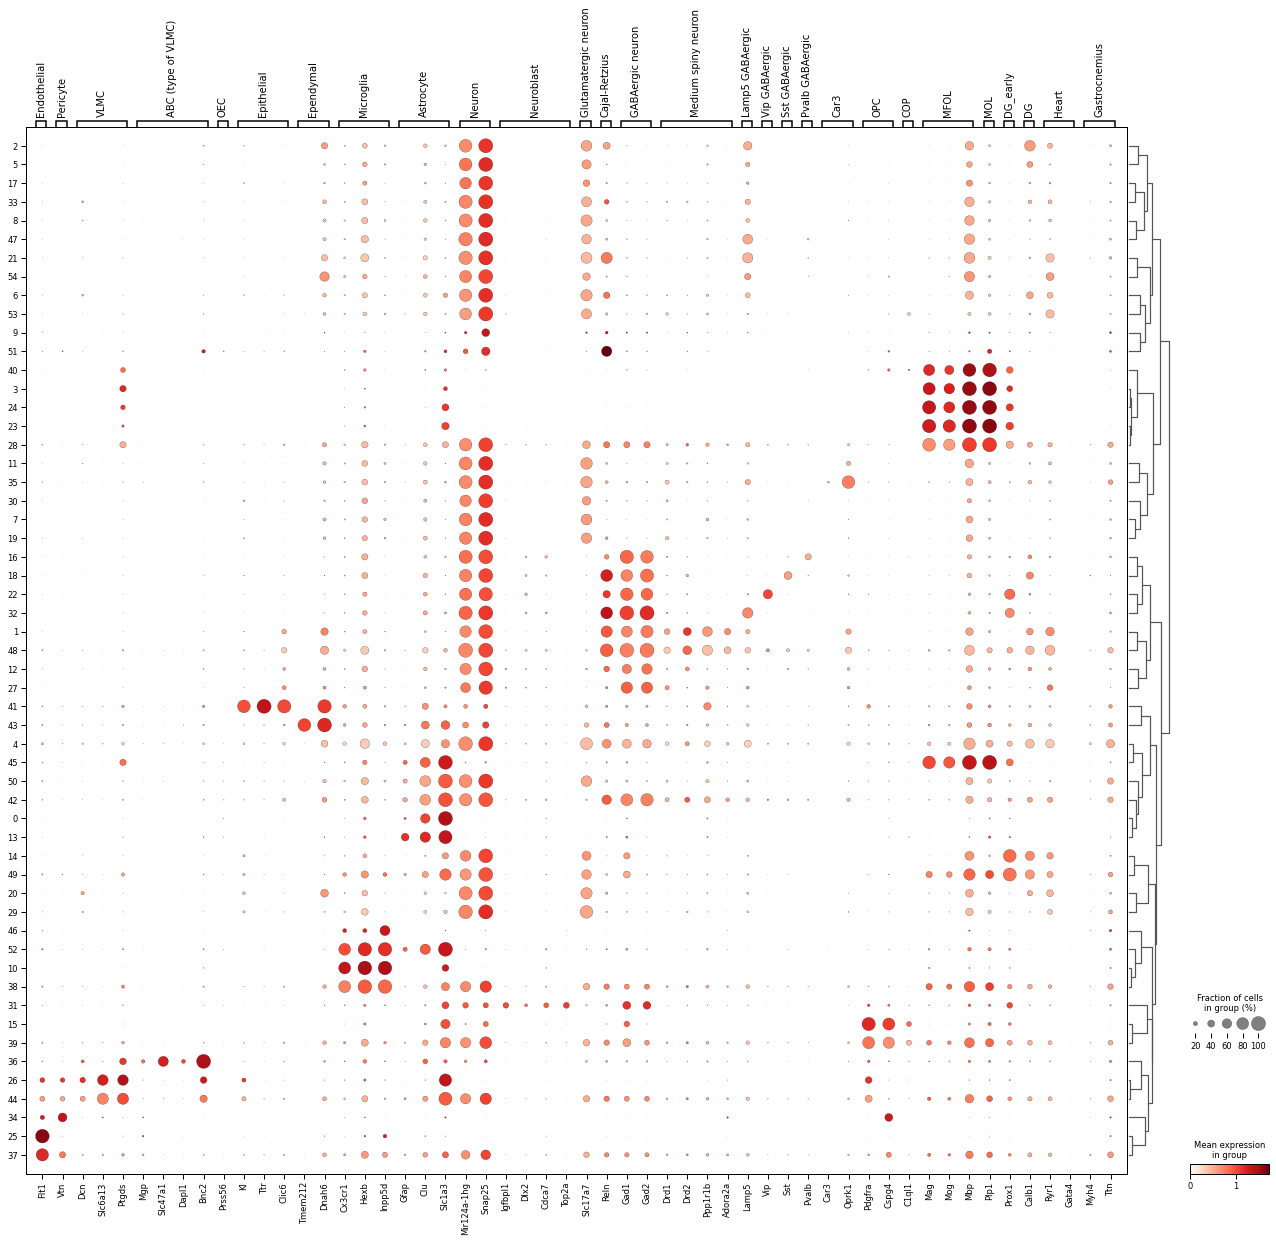

In [13]:
sc.pl.dotplot(adata, smol_marker_genes_dict, 'leiden', mean_only_expressed = True,
              dendrogram=True, log=True)


In [14]:
hipp_dict = {
    'CA1': ['Cck', 'Cnr1', 'Fibcd1', 'Gabra3', 'Grm3', 'Man1a', 'Neurod6', 'Nos1', 'Satb2'],
    'CA2': ['Amigo2', 'Cacng5'],
    'CA3': ['Bok', 'Cck', 'Cnr1', 'Grik4', 'Man1a', 'Neurod6', 'Nos1', 'Npy2r', 'Nr4a3', 'Nrp2']
}


sc.pl.dotplot(adata, hipp_dict, 'leiden', mean_only_expressed = True,
              dendrogram=True, log=True)


categories: 0, 1, 2, etc.
var_group_labels: CA1, CA2, CA3


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


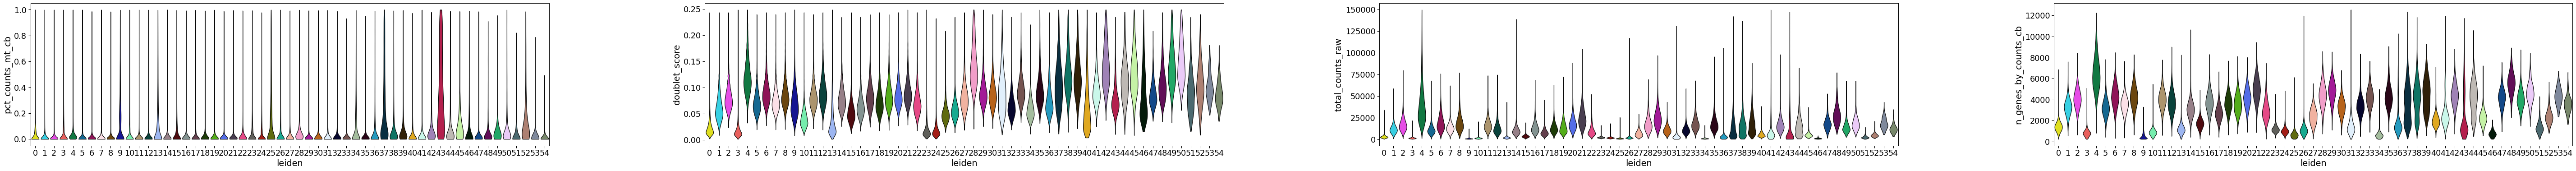

In [15]:
plt.rcParams['figure.figsize'] = (16, 6)

sc.pl.violin(adata, ['pct_counts_mt_cb', 'doublet_score', 'total_counts_raw', 'n_genes_by_counts_cb'],
             groupby = "leiden", 
             jitter=0.4, multi_panel=True, size=0)

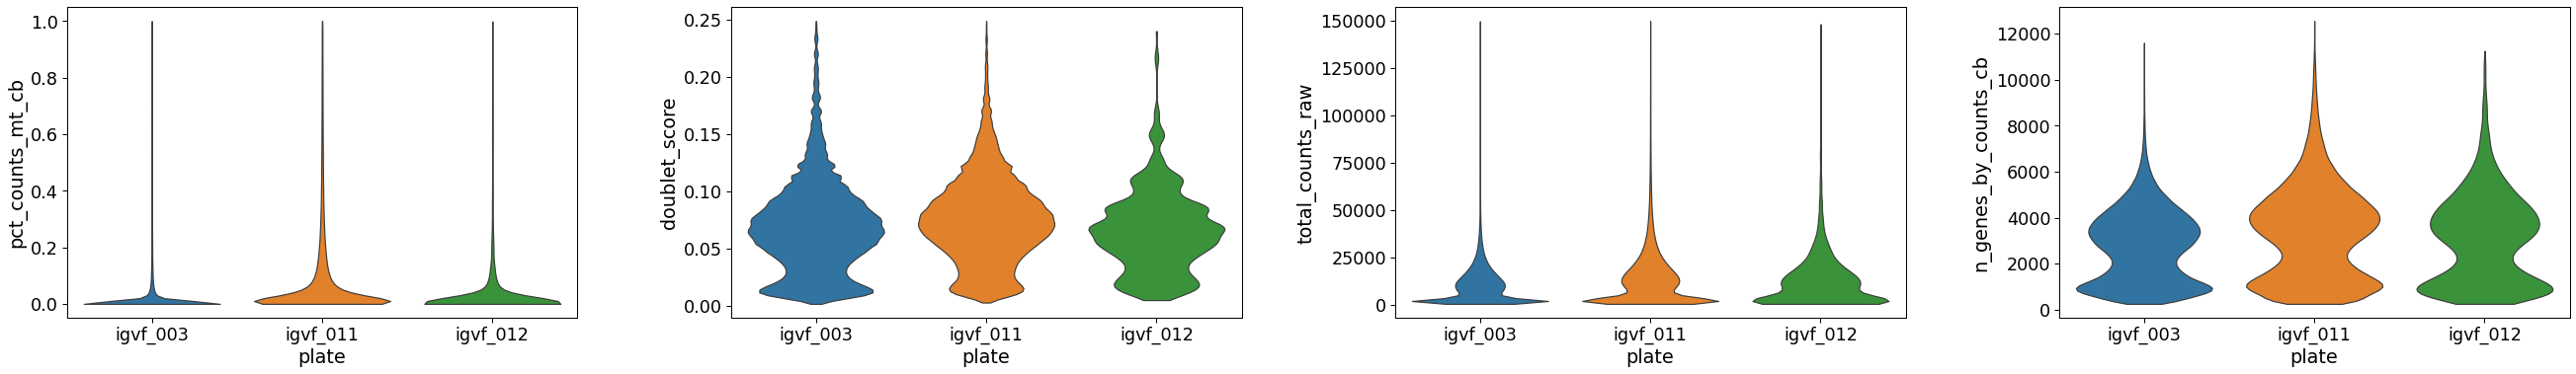

In [16]:
plt.rcParams['figure.figsize'] = (8, 6)

sc.pl.violin(adata, ['pct_counts_mt_cb', 'doublet_score', 'total_counts_raw', 'n_genes_by_counts_cb'],
             groupby = "plate", 
             jitter=0.4, multi_panel=True, size=0)

In [17]:
plt.rcParams['figure.figsize'] = (8, 8)


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


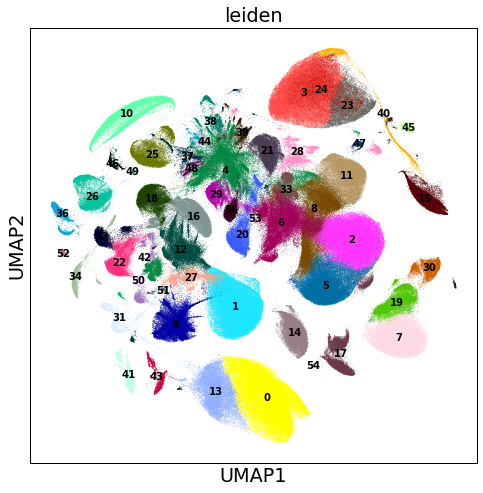

In [18]:
sc.pl.umap(adata, color=['leiden'], size=1, legend_fontsize = 10, legend_loc = 'on data')


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


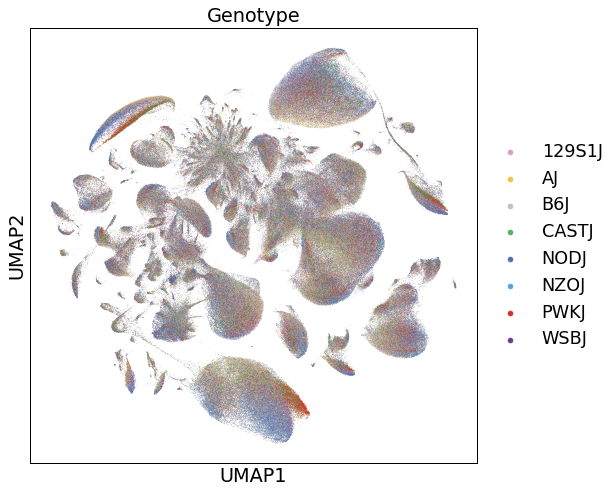

In [19]:
sc.pl.umap(adata, color=['Genotype'], size = 0.8, palette = geno_palette)


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


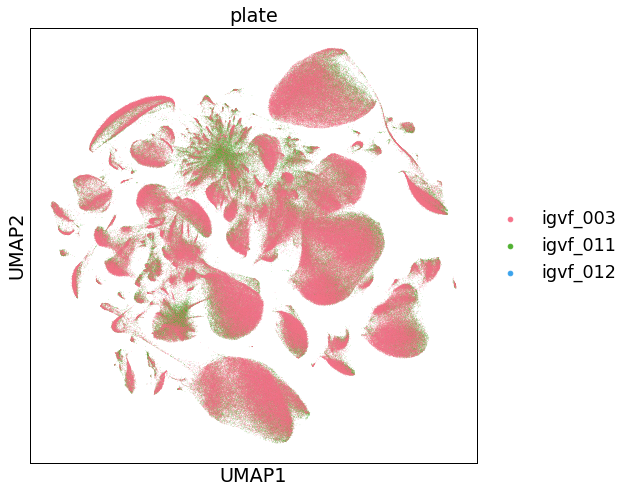

In [20]:
sc.pl.umap(adata, color=['plate'], size = 0.8, palette = plate_palette)


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


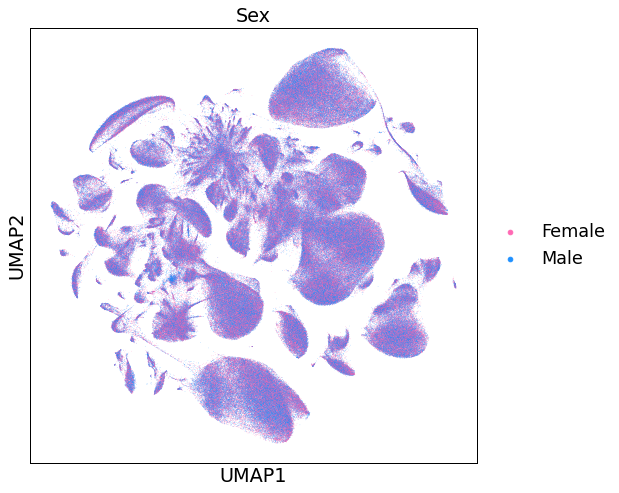

In [21]:
sc.pl.umap(adata, color=['Sex'], size = 0.8, palette = sex_palette)


In [22]:
adata

AnnData object with n_obs × n_vars = 731687 × 56953
    obs: 'lab_sample_id', 'sample', 'plate', 'subpool', 'SampleType', 'Tissue', 'Sex', 'Age', 'Genotype', 'subpool_type', 'Protocol', 'Chemistry', 'bc', 'bc1_sequence', 'bc2_sequence', 'bc3_sequence', 'bc1_well', 'bc2_well', 'bc3_well', 'Row', 'Column', 'well_type', 'Mouse_Tissue_ID', 'DOB', 'Age_days', 'Body_weight_g', 'Estrus_cycle', 'Dissection_date', 'Dissection_time', 'ZT', 'Dissector', 'Tissue_weight_mg', 'Notes', 'n_genes_by_counts_raw', 'total_counts_raw', 'total_counts_mt_raw', 'pct_counts_mt_raw', 'n_genes_by_counts_cb', 'total_counts_cb', 'total_counts_mt_cb', 'pct_counts_mt_cb', 'doublet_score', 'predicted_doublet', 'background_fraction', 'cell_probability', 'cell_size', 'droplet_efficiency', 'leiden'
    var: 'gene_id', 'gene_name', 'mt', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden', 'log1p', 'neighbors', 'umap', 'dendrogram_leiden', 'leiden_colors', 'plate_colors', 'Genotype_colo

In [23]:
plt.rcParams['figure.figsize'] = (8, 8)


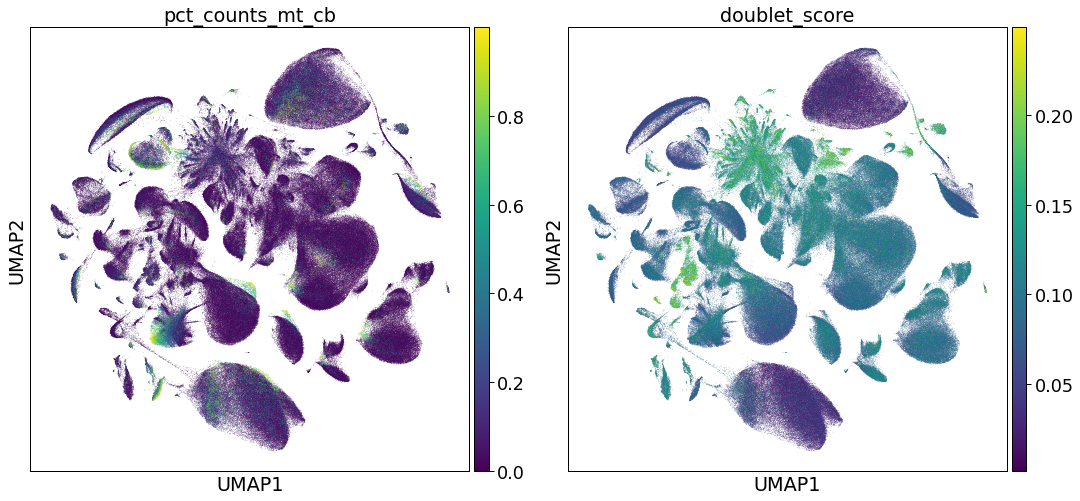

In [24]:
sc.pl.umap(adata, color=['pct_counts_mt_cb','doublet_score'], size = 0.8, palette = plate_palette)


In [25]:
adata

AnnData object with n_obs × n_vars = 731687 × 56953
    obs: 'lab_sample_id', 'sample', 'plate', 'subpool', 'SampleType', 'Tissue', 'Sex', 'Age', 'Genotype', 'subpool_type', 'Protocol', 'Chemistry', 'bc', 'bc1_sequence', 'bc2_sequence', 'bc3_sequence', 'bc1_well', 'bc2_well', 'bc3_well', 'Row', 'Column', 'well_type', 'Mouse_Tissue_ID', 'DOB', 'Age_days', 'Body_weight_g', 'Estrus_cycle', 'Dissection_date', 'Dissection_time', 'ZT', 'Dissector', 'Tissue_weight_mg', 'Notes', 'n_genes_by_counts_raw', 'total_counts_raw', 'total_counts_mt_raw', 'pct_counts_mt_raw', 'n_genes_by_counts_cb', 'total_counts_cb', 'total_counts_mt_cb', 'pct_counts_mt_cb', 'doublet_score', 'predicted_doublet', 'background_fraction', 'cell_probability', 'cell_size', 'droplet_efficiency', 'leiden'
    var: 'gene_id', 'gene_name', 'mt', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden', 'log1p', 'neighbors', 'umap', 'dendrogram_leiden', 'leiden_colors', 'plate_colors', 'Genotype_colo

In [26]:
old_annots = pd.read_csv(f'../IGVF_analysis/annotated_tissues/{tissue}_annotated_metadata.csv')
old_annots['subpool'] = old_annots['subpool'].str.replace(r'Sublibrary_(\d+)', r'Subpool_\1', regex=True)

subpool_mapping = {
    "13A": "Subpool_1",
    "13B": "Subpool_2",
    "13C": "Subpool_3",
    "13D": "Subpool_4",
    "13E": "Subpool_5",
    "13F": "Subpool_6",
    "13G": "Subpool_7",
    "13H": "Subpool_8"
}

# Update the subpool column for the specified plate
old_annots.loc[old_annots['plate'] == 'igvf_012', 'subpool'] = (
    old_annots['subpool'].map(subpool_mapping)
)


old_annots['cellID'] = old_annots['bc1_well'] + "_" + old_annots['bc2_well'] + "_" + old_annots['bc3_well'] + "_" + old_annots['subpool']  + "_" + old_annots['plate'] 



/tmp/ipykernel_3345546/134062919.py:1: DtypeWarning: Columns (12,13,21,22,23,31,36,37,38,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  old_annots = pd.read_csv(f'../IGVF_analysis/annotated_tissues/{tissue}_annotated_metadata.csv')


In [27]:
new_cells = adata.obs.index.tolist()
old_cells = old_annots['cellID'].tolist()

new_cells_series = pd.Series(new_cells)
old_cells_series = pd.Series(old_cells)


old_in_new = old_cells_series.isin(new_cells)
new_in_old = new_cells_series.isin(old_cells)


old_not_in_new = old_cells_series[~old_in_new]
new_not_in_old = new_cells_series[~new_in_old]

print(f"Number of old_cells not in new_cells: {len(old_not_in_new)}")

print(f"Number of new_cells not in old_cells: {len(new_not_in_old)}")


Number of old_cells not in new_cells: 85519
Number of new_cells not in old_cells: 64884


In [28]:
old_annots.set_index('cellID', inplace=True)
transfer_df = old_annots[['subtype', 'celltype']]

adata_obs = adata.obs.copy()

# Merge the dataframes, adding the 'subtype' and 'celltype' columns to adata.obs
adata_obs = adata_obs.join(transfer_df, how='left')


In [29]:
# Ensure missing values are explicitly set as NA
adata_obs['subtype'].fillna(value="NA", inplace=True)
adata_obs['celltype'].fillna(value="NA", inplace=True)

In [30]:
adata_obs.head()

lab_sample_id sample     plate    subpool  \
cellID                                                                      
C4_B1_C3_Subpool_1_igvf_012   046_NZOJ_10F_03     NA  igvf_012  Subpool_1   
C2_F8_C4_Subpool_1_igvf_012   046_NZOJ_10F_03     NA  igvf_012  Subpool_1   
C2_E7_G9_Subpool_1_igvf_012   046_NZOJ_10F_03     NA  igvf_012  Subpool_1   
C1_E9_G10_Subpool_1_igvf_012  046_NZOJ_10F_03     NA  igvf_012  Subpool_1   
C4_C4_G9_Subpool_1_igvf_012   046_NZOJ_10F_03     NA  igvf_012  Subpool_1   

                             SampleType             Tissue     Sex     Age  \
cellID                                                                       
C4_B1_C3_Subpool_1_igvf_012      Nuclei  CortexHippocampus  Female  PNM_02   
C2_F8_C4_Subpool_1_igvf_012      Nuclei  CortexHippocampus  Female  PNM_02   
C2_E7_G9_Subpool_1_igvf_012      Nuclei  CortexHippocampus  Female  PNM_02   
C1_E9_G10_Subpool_1_igvf_012     Nuclei  CortexHippocampus  Female  PNM_02   
C4_C4_G9_Subpool_1_igvf_012      Nuclei  CortexHippocampus  Female  PNM_02   

                             Genotype subpool_type  ... pct_counts_mt_cb  \
cellID                                              ...                    
C4_B1_C3_Subpool_1_igvf_012      NZOJ           NO  ...         0.019162   
C2_F8_C4_Subpool_1_igvf_012      NZOJ           NO  ...         0.011038   
C2_E7_G9_Subpool_1_igvf_012      NZOJ           NO  ...         0.013088   
C1_E9_G10_Subpool_1_igvf_012     NZOJ           NO  ...         0.005478   
C4_C4_G9_Subpool_1_igvf_012      NZOJ           NO  ...         0.015614   

                             doublet_score predicted_doublet  \
cellID                                                         
C4_B1_C3_Subpool_1_igvf_012       0.111111             False   
C2_F8_C4_Subpool_1_igvf_012       0.066667             False   
C2_E7_G9_Subpool_1_igvf_012       0.080645             False   
C1_E9_G10_Subpool_1_igvf_012      0.080645             False   
C4_C4_G9_Subpool_1_igvf_012       0.069388             False   

                             background_fraction cell_probability  \
cellID                                                              
C4_B1_C3_Subpool_1_igvf_012             0.000109         0.999955   
C2_F8_C4_Subpool_1_igvf_012             0.000132         0.999955   
C2_E7_G9_Subpool_1_igvf_012             0.000123         0.999955   
C1_E9_G10_Subpool_1_igvf_012            0.000128         0.999955   
C4_C4_G9_Subpool_1_igvf_012             0.000245         0.999955   

                                 cell_size droplet_efficiency leiden  \
cellID                                                                 
C4_B1_C3_Subpool_1_igvf_012   58400.378906           2.499987      4   
C2_F8_C4_Subpool_1_igvf_012   54340.687500           2.499933      4   
C2_E7_G9_Subpool_1_igvf_012   51951.093750           2.499962      4   
C1_E9_G10_Subpool_1_igvf_012  43849.246094           2.498905      4   
C4_C4_G9_Subpool_1_igvf_012   35953.289062           2.498132      4   

                                  subtype     celltype  
cellID                                                  
C4_B1_C3_Subpool_1_igvf_012   low quality  low quality  
C2_F8_C4_Subpool_1_igvf_012            NA           NA  
C2_E7_G9_Subpool_1_igvf_012            NA           NA  
C1_E9_G10_Subpool_1_igvf_012           NA           NA  
C4_C4_G9_Subpool_1_igvf_012            NA           NA  

[5 rows x 50 columns]

In [33]:
adata.obs['celltype_carryover'] = adata_obs['celltype']
adata.obs['subtype_carryover'] = adata_obs['subtype']

/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


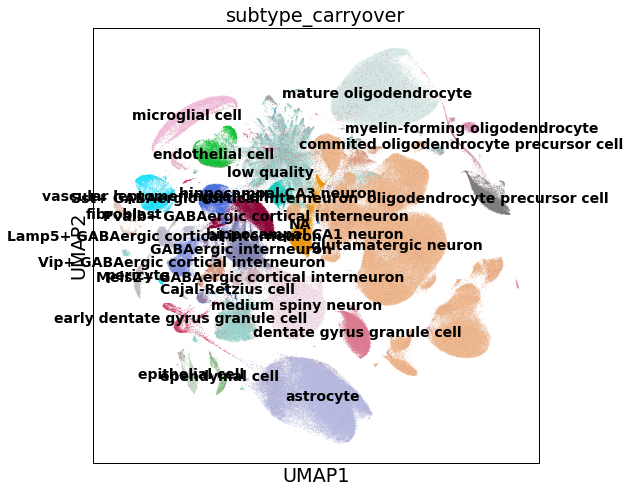

In [34]:
sc.pl.umap(adata, color=['subtype_carryover'], size = 1, legend_fontsize = 14, legend_loc = "on data")


In [35]:
# Plot UMAP
ax = sc.pl.umap(adata, color=['subtype_carryover'], size=1, legend_fontsize=20, show=False)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5), markerscale=2, fontsize=20, ncol=2)
plt.show()

/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


In [36]:
stacked_barplot_proportions(adata.obs, 
                            'leiden', 'subtype_carryover',
                            reverse_order = True,
                            custom_colors = adata.uns["subtype_carryover_colors"],
                            fsize = (6.5,15), 
                            annotations = True)


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


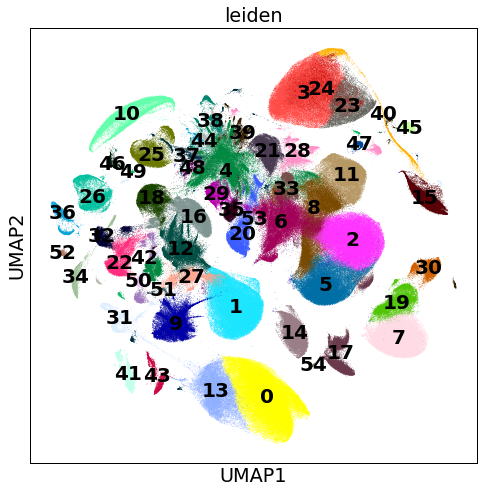

In [37]:
sc.pl.umap(adata, color=['leiden'], size=1, legend_fontsize = 20, legend_loc = 'on data')


# Annotate

In [17]:
annots = pd.read_csv("post_cellbender_annotations.csv")
annots = annots[annots['tissue'] == tissue]
annots['leiden'] = annots['leiden'].astype(str)

annotation_dict = annots.groupby('leiden').head(1).set_index('leiden')['general_celltype'].to_dict()
adata.obs['general_celltype'] = adata.obs['leiden'].map(annotation_dict)
annotation_dict = annots.groupby('leiden').head(1).set_index('leiden')['general_CL_ID'].to_dict()
adata.obs['general_CL_ID'] = adata.obs['leiden'].map(annotation_dict)

annotation_dict = annots.groupby('leiden').head(1).set_index('leiden')['celltype'].to_dict()
adata.obs['celltype'] = adata.obs['leiden'].map(annotation_dict)
annotation_dict = annots.groupby('leiden').head(1).set_index('leiden')['CL_ID'].to_dict()
adata.obs['CL_ID'] = adata.obs['leiden'].map(annotation_dict)

annotation_dict = annots.groupby('leiden').head(1).set_index('leiden')['subtype'].to_dict()
adata.obs['subtype'] = adata.obs['leiden'].map(annotation_dict)


In [18]:
plt.rcParams['figure.figsize'] = (8, 8)


In [19]:
sc.pl.umap(adata, color=['subtype'], size=1, legend_fontsize = 10, legend_loc = 'on data')


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


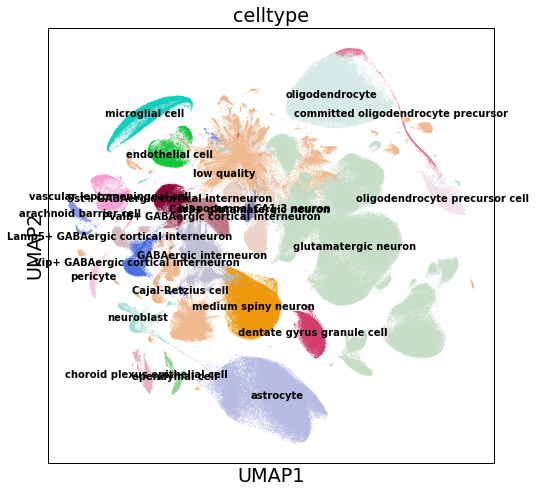

In [20]:
sc.pl.umap(adata, color=['celltype'], size=1, legend_fontsize = 10, legend_loc = 'on data')


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


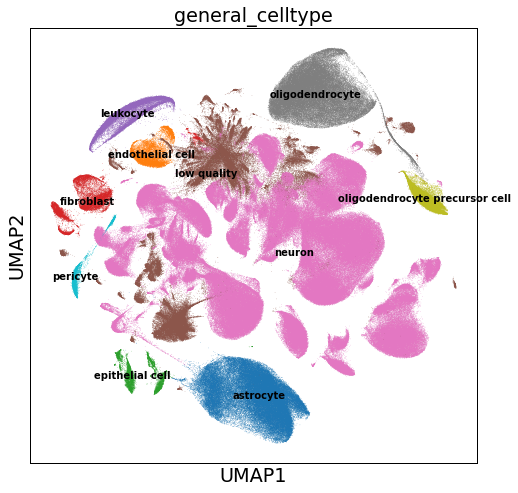

In [21]:
sc.pl.umap(adata, color=['general_celltype'], size=1, legend_fontsize = 10, legend_loc = 'on data')


In [22]:
adata

AnnData object with n_obs × n_vars = 731687 × 56953
    obs: 'lab_sample_id', 'sample', 'plate', 'subpool', 'SampleType', 'Tissue', 'Sex', 'Age', 'Genotype', 'subpool_type', 'Protocol', 'Chemistry', 'bc', 'bc1_sequence', 'bc2_sequence', 'bc3_sequence', 'bc1_well', 'bc2_well', 'bc3_well', 'Row', 'Column', 'well_type', 'Mouse_Tissue_ID', 'DOB', 'Age_days', 'Body_weight_g', 'Estrus_cycle', 'Dissection_date', 'Dissection_time', 'ZT', 'Dissector', 'Tissue_weight_mg', 'Notes', 'n_genes_by_counts_raw', 'total_counts_raw', 'total_counts_mt_raw', 'pct_counts_mt_raw', 'n_genes_by_counts_cb', 'total_counts_cb', 'total_counts_mt_cb', 'pct_counts_mt_cb', 'doublet_score', 'predicted_doublet', 'background_fraction', 'cell_probability', 'cell_size', 'droplet_efficiency', 'leiden', 'general_celltype', 'general_CL_ID', 'celltype', 'CL_ID', 'subtype'
    var: 'gene_id', 'gene_name', 'mt', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden', 'log1p', 'neighbors', 'umap',

In [ ]:
# adata.obs.drop(columns='celltype_carryover', inplace=True)
# adata.obs.drop(columns='subtype_carryover', inplace=True)

In [29]:
meta = adata.obs
meta.to_csv(f"../IGVF_analysis/cellbender_tissues/obs_tables/{tissue}_annotated_metadata.csv")


In [30]:
adata.write_h5ad(f'../IGVF_analysis/cellbender_tissues/{tissue}_annotated.h5ad')


In [5]:
adata = sc.read_h5ad(f'../IGVF_analysis/cellbender_tissues/annotated/{tissue}_annotated.h5ad')

In [6]:
sc.pl.dotplot(adata, ['Flt1', 'Lyve1', 'Snap25'], 'subtype', mean_only_expressed = True,
              dendrogram=True, log=True)


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)
